In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import wordcloud as wc
import jieba as jb
from string import punctuation

In [2]:
# setting
my_font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Medium.ttc",size=10)
sns.set(style="dark", context="notebook", font=my_font.get_name())
%matplotlib inline

In [3]:
# read data
job_table = pd.read_csv("/Users/llx/PyProjects/job_wizard/数据分析_20200201.csv")

In [34]:
# overview
job_table.size

6292

In [35]:
job_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 26 columns):
Add_Date           242 non-null int64
Add_Time           242 non-null object
Advantage          242 non-null object
Company            242 non-null object
Degree             242 non-null object
Description        242 non-null object
Experience         242 non-null object
Finance            242 non-null object
Highlights         242 non-null object
If_Intern          242 non-null int64
Income_Max(k)      242 non-null int64
Income_Mid(k)      242 non-null float64
Income_Min(k)      242 non-null int64
Income_Range(k)    242 non-null object
Industry           242 non-null object
Location           242 non-null object
Path               242 non-null object
Size               242 non-null object
Sys_Date           242 non-null int64
Sys_Time           242 non-null object
Tags               242 non-null object
Title              242 non-null object
Desc_Max_Inc       242 non-null category


In [36]:
job_table.describe()

,Add_Date,If_Intern,Income_Max(k),Income_Mid(k),Income_Min(k),Sys_Date
count,2.420000e+02,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2.019960e+07,0.049587,25.830579,20.280992,14.731405,2.020018e+07
std,2.080281e+03,0.217540,14.615409,11.250337,8.120856,3.374299e+01
min,2.019122e+07,0.000000,1.000000,1.000000,1.000000,2.020013e+07
25%,2.020011e+07,0.000000,15.250000,12.500000,10.000000,2.020013e+07
50%,2.020012e+07,0.000000,25.000000,20.000000,15.000000,2.020020e+07
75%,2.020012e+07,0.000000,30.000000,26.125000,20.000000,2.020020e+07
max,2.020020e+07,1.000000,80.000000,65.000000,50.000000,2.020020e+07


In [37]:
# data preprocessing
salary_bins = [x*5 for x in range(20)]
income_stats = ["Max", "Mid", "Min"]

for income_stat in income_stats:
    job_table["Desc_"+income_stat+"_Inc"] = pd.cut(job_table["Income_"+income_stat+"(k)"], bins=salary_bins)

job_table["Desc_Industry"] = job_table["Industry"].str.split(",").str[0]

job_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 26 columns):
Add_Date           242 non-null int64
Add_Time           242 non-null object
Advantage          242 non-null object
Company            242 non-null object
Degree             242 non-null object
Description        242 non-null object
Experience         242 non-null object
Finance            242 non-null object
Highlights         242 non-null object
If_Intern          242 non-null int64
Income_Max(k)      242 non-null int64
Income_Mid(k)      242 non-null float64
Income_Min(k)      242 non-null int64
Income_Range(k)    242 non-null object
Industry           242 non-null object
Location           242 non-null object
Path               242 non-null object
Size               242 non-null object
Sys_Date           242 non-null int64
Sys_Time           242 non-null object
Tags               242 non-null object
Title              242 non-null object
Desc_Max_Inc       242 non-null category


In [38]:
job_table.head()

,Add_Date,Add_Time,Advantage,Company,Degree,Description,Experience,Finance,Highlights,If_Intern,...,Path,Size,Sys_Date,Sys_Time,Tags,Title,Desc_Max_Inc,Desc_Mid_Inc,Desc_Min_Inc,Desc_Industry
0,20200131,12:12,大平台 行业领先 福利待遇好,招银网络科技,本科,职责描述：\n1. 负责公司大数据平台整体解决方案规划、设计、开发和完善.\n2. 制定数据...,经验1-3年,不需要融资,“大平台 行业领先 福利待遇好”,0,...,https://www.lagou.com/jobs/6692363.html?show=2...,2000人以上,20200131,22:28:00,Hadoop Spark,大数据分析岗,"(25, 30]","(20, 25]","(15, 20]",金融
1,20200131,16:29,公司快融资,数神科技,不限,岗位职责：\n1.市场分析，供应商产品分析，负责公司的产品数据分析；\n2.通过建立数学分析...,经验3-5年,未融资,“公司快融资”,0,...,https://www.lagou.com/jobs/6782767.html?show=2...,150-500人,20200131,22:28:56,BI SQL SPSS 数据运营,数据分析师,"(20, 25]","(15, 20]","(10, 15]",移动互联网
2,20200126,00:00,发展空间大，有转正机会,杰豪科技,本科,岗位职责：\n1、研究模型和算法、人工智能（机器人学习），根据业务和场景需求设计构建大数据模...,经验1年以下,未融资,“发展空间大，有转正机会”,0,...,https://www.lagou.com/jobs/6770261.html?show=2...,15-50人,20200131,22:30:17,大数据 移动互联网 数据挖掘 数据架构 SQLServer,数据建模,"(15, 20]","(10, 15]","(10, 15]",金融
3,20200113,00:00,国际化平台、环境舒适、好玩有趣,KLOOK 客路旅行,本科,【岗位职责】\n1. 用户模型研究，根据不同业务场景提供用户相关数据分析\n2. 挖掘业务数...,经验1-3年,D轮及以上,“国际化平台、环境舒适、好玩有趣”,0,...,https://www.lagou.com/jobs/6112946.html?show=2...,500-2000人,20200131,22:31:11,零食水果供应 带薪年假 绩效奖金 扁平管理,数据分析,"(30, 35]","(25, 30]","(15, 20]",旅游
4,20200131,21:09,五险一金 周末双休 年终奖,小鹅（小鹅通）,本科,岗位职责：\n1. 运用多种分析手段和方法（如海量数据分析和挖掘手段、资料收集&分析、行业研...,经验3-5年,B轮,“五险一金 周末双休 年终奖”,0,...,https://www.lagou.com/jobs/6501999.html?show=2...,150-500人,20200131,22:31:35,大数据,资深数据分析师,"(35, 40]","(25, 30]","(15, 20]",移动互联网


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


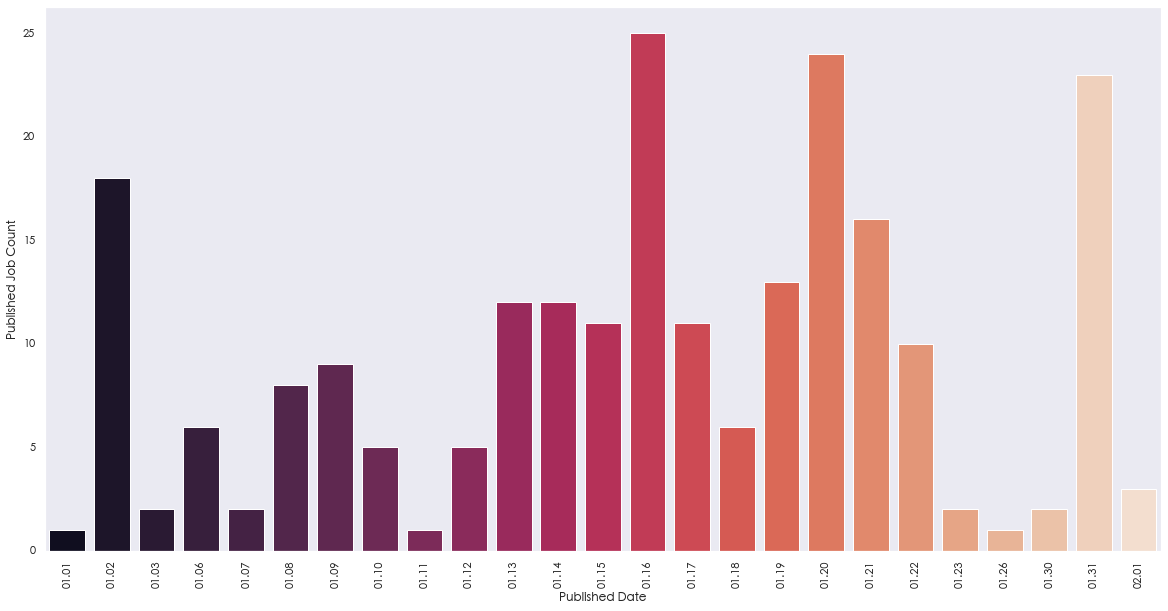

In [15]:
# Question 1
# How many of them were published in last week?
publish_cnt = job_table.groupby(["Add_Date"], as_index=False)["Path"].count().rename(columns={"Path": "count"})
publish_cnt2 = publish_cnt[publish_cnt["Add_Date"] >= 20200101]
publish_cnt2["date"] = pd.to_datetime(publish_cnt2["Add_Date"], format="%Y%m%d").dt.strftime("%m.%d")
plt.figure(figsize=(20,10))
plot_publish = sns.barplot(x="date", y="count", data=publish_cnt2, palette="rocket")
plot_publish.set_xticklabels(plot_publish.get_xticklabels(), rotation=90)
plt.xlabel("Published Date")
plt.ylabel("Published Job Count")
plt.show()

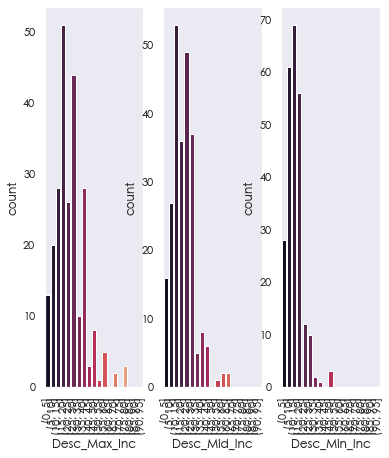

In [21]:
# Question 2
# What are the salaries of these jobs?
salary_cnt = {}
for income_stat in income_stats:
	salary_cnt[income_stat] = job_table.groupby(["Desc_"+income_stat+"_Inc"], as_index=False)["Path"].count().rename(columns={"Path": "count"})

fig, axs = plt.subplots(1, 3, figsize=(6,7))
plot_salary = {}
for index, income_stat in enumerate(income_stats):
	plot_salary[income_stat] = sns.barplot(x="Desc_"+income_stat+"_Inc", y="count", data=salary_cnt[income_stat], palette="rocket", ax=axs[index])
	plot_salary[income_stat].set_xticklabels(plot_salary[income_stat].get_xticklabels(), rotation=90)

plt.show()

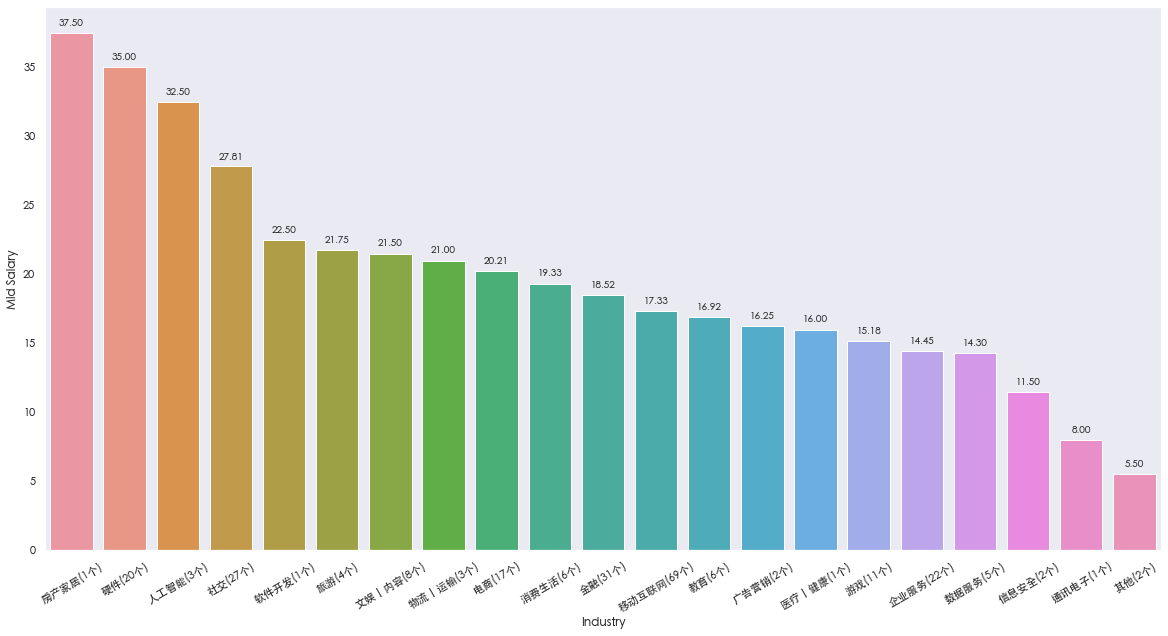

In [22]:
# Question 3
# Which industries would like to pay more?
job_table["Industry"].unique().tolist()
unique_industry = job_table["Desc_Industry"].unique().tolist()
industry_cnt = job_table.groupby(["Desc_Industry"], as_index=False)["Income_Mid(k)"].agg(["count","mean"]).reset_index().sort_values(["mean"], ascending=False)
industry_cnt["Desc_Industry2"] = industry_cnt["Desc_Industry"] + "(" + industry_cnt["count"].astype(str) + "个)"

plt.figure(figsize=(20,10))
plot_industry = sns.barplot(x="Desc_Industry2", y="mean", data=industry_cnt)

for p in plot_industry.patches:
	plot_industry.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")

plot_industry.set_xticklabels(plot_industry.get_xticklabels(), rotation=30)

plt.xlabel("Industry")
plt.ylabel("Mid Salary")
plt.show()


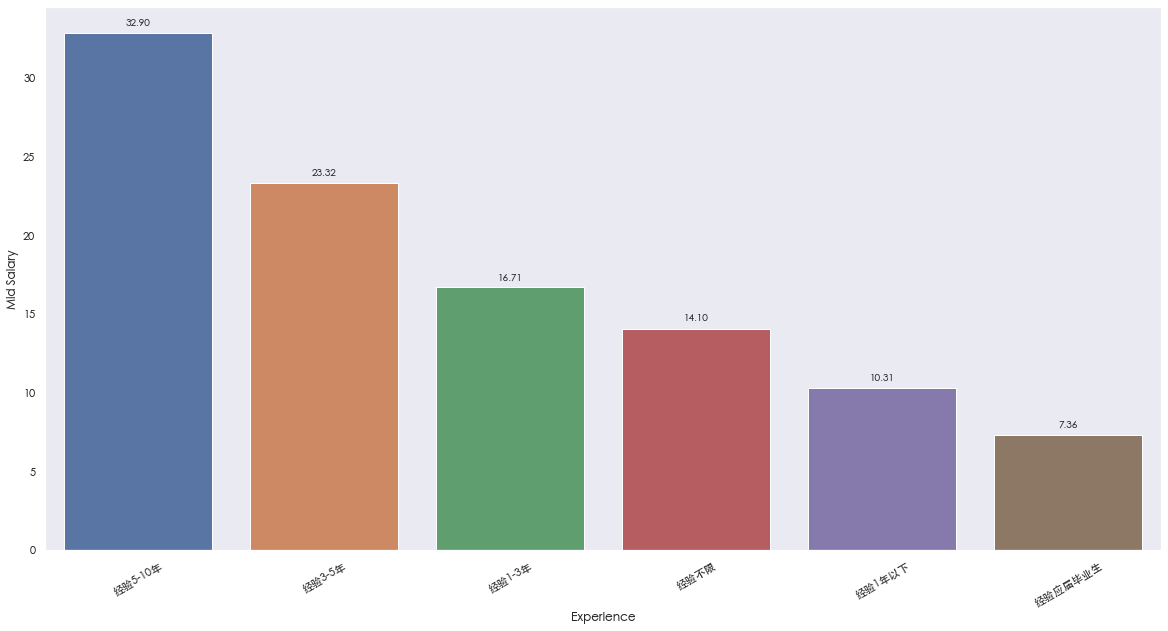

In [28]:
# Question 4
# Which types of experiences would be paad more?
job_table["Experience"].unique().tolist()
experience_cnt = job_table.groupby(["Experience"])["Income_Mid(k)"].agg(["count","mean"]).reset_index().sort_values(["mean"], ascending=False)

plt.figure(figsize=(20,10))
plot_experience = sns.barplot(x="Experience", y="mean", data=experience_cnt)

for p in plot_experience.patches:
    plot_experience.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")

plot_experience.set_xticklabels(plot_experience.get_xticklabels(), rotation=30)

plt.xlabel("Experience")
plt.ylabel("Mid Salary")
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


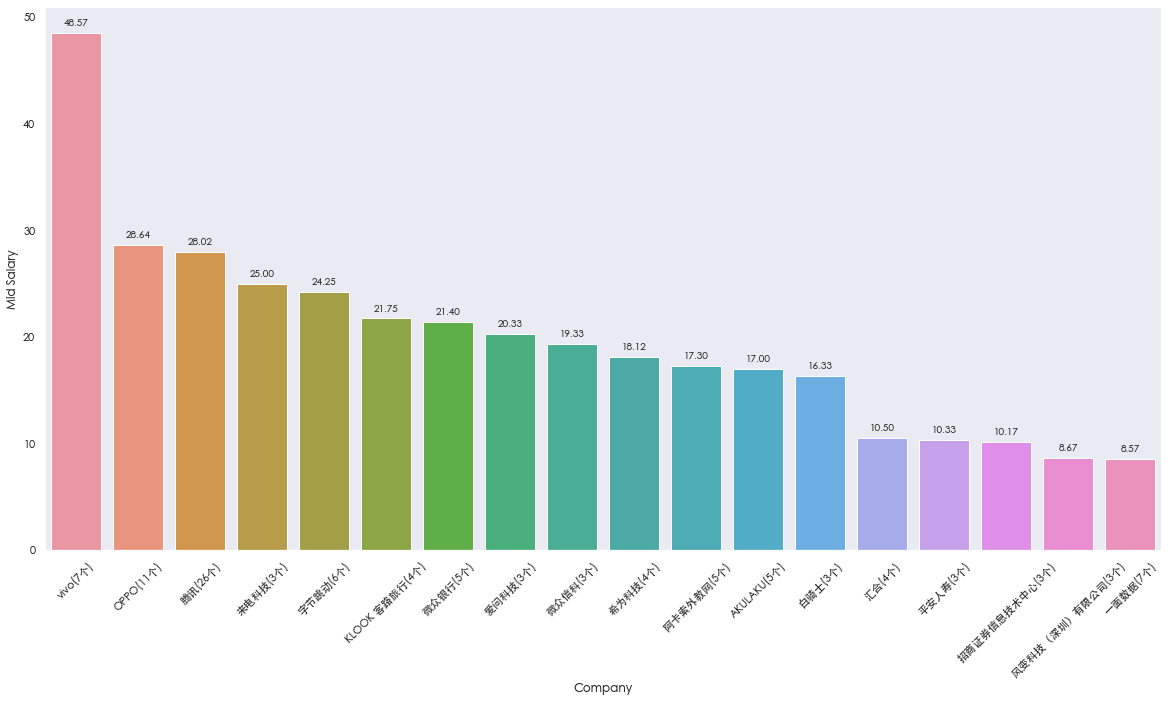

In [33]:
# Question 5
# Which companies would pay more?
job_table["Company"].unique().tolist()
company_mean = job_table.groupby(["Company"])["Income_Mid(k)"].agg(["count","mean"]).reset_index().sort_values(["mean"], ascending=False)
company_cnt = company_mean[company_mean["count"]>2]
company_cnt["Desc_Company"] = company_cnt["Company"] + "(" + company_cnt["count"].astype(str) + "个)"

plt.figure(figsize=(20,10))
plot_company = sns.barplot(x="Desc_Company", y="mean", data=company_cnt)

for p in plot_company.patches:
    plot_company.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")

plot_company.set_xticklabels(plot_company.get_xticklabels(), rotation=45)

plt.xlabel("Company")
plt.ylabel("Mid Salary")
plt.show()

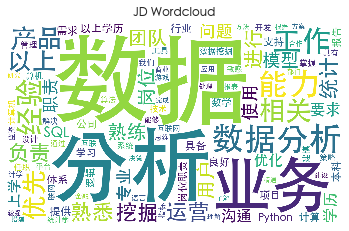

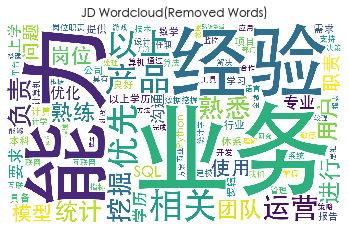

In [44]:
# Question 6
# What skills are preffered?
add_punc = '，。、【 】 “”：；（）《》‘’{}？！⑦()、%^>℃：.”“^-——=&#@￥．'
all_punc = add_punc + punctuation
jb_list = job_table["Description"].tolist()
jb_text = []
for jb_element in jb_list:
	jb_seg = jb.cut_for_search(jb_element)
	for jb_word in jb_seg:
		if jb_word.strip() not in all_punc:
			jb_text.append(jb_word.strip())

jb_freq = pd.DataFrame(jb_text, columns=["jb_word"])
jb_freq["cnt"] = 1
jb_group = jb_freq.groupby("jb_word").agg("count").reset_index().sort_values(["cnt"], ascending=False)
jb_group2 = jb_group[jb_group["cnt"]>20]

jb_freq2 = jb_freq.loc[jb_freq["jb_word"].str.len()>2]
jb_freq3 = jb_freq2.groupby("jb_word").count()

jb_wc = wc.WordCloud(
    font_path=r"/System/Library/Fonts/STHeiti Medium.ttc",     #字体路劲
    background_color="white",   #背景颜色
    width=1000,
    height=600,
    max_font_size=300,            #字体大小
    min_font_size=10,
    max_words=100,
    collocations=False,
    font_step=1
)

plot_jb = jb_wc.generate(" ".join(jb_text))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb)
plt.axis("off")
plt.title("JD Wordcloud")
plt.show()

jb_text2 = [x for x in jb_text if x not in ["数据", "分析", "数据分析", "工作"]]
plot_jb2 = jb_wc.generate(" ".join(jb_text2))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb2)
plt.axis("off")
plt.title("JD Wordcloud(Removed Words)")
plt.show()

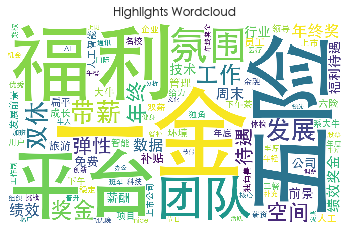

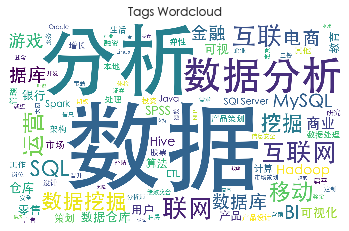

In [45]:
# Question 7
# Wordcloud for Highlights
jb_list = job_table["Highlights"].tolist()
jb_text = []
for jb_element in jb_list:
    jb_seg = jb.cut_for_search(jb_element)
    for jb_word in jb_seg:
        if jb_word.strip() not in all_punc:
            jb_text.append(jb_word.strip())

jb_freq = pd.DataFrame(jb_text, columns=["jb_word"])   

plot_jb = jb_wc.generate(" ".join(jb_text))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb)
plt.axis("off")
plt.title("Highlights Wordcloud")
plt.show()
            
# Wordcloud for tags
jb_list = job_table["Tags"].tolist()
jb_text = []
for jb_element in jb_list:
    jb_seg = jb.cut_for_search(jb_element)
    for jb_word in jb_seg:
        if jb_word.strip() not in all_punc:
            jb_text.append(jb_word.strip())

jb_freq = pd.DataFrame(jb_text, columns=["jb_word"])   

plot_jb = jb_wc.generate(" ".join(jb_text))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb)
plt.axis("off")
plt.title("Tags Wordcloud")
plt.show()